In [121]:
from sklearn.datasets import load_boston
import numpy as np

## Load dataset

In [122]:
boston = load_boston()

In [123]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

```
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's
```

In [124]:
import pandas as pd

In [125]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Explore data, construct datasets

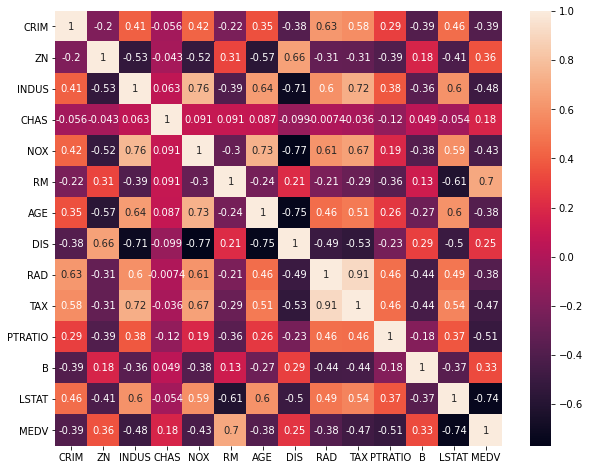

In [126]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)
plt.show()

In [127]:
features = corr['MEDV'].abs().sort_values(ascending = False).index.values[1:]
print(features)

['LSTAT' 'RM' 'PTRATIO' 'INDUS' 'TAX' 'NOX' 'CRIM' 'RAD' 'AGE' 'ZN' 'B'
 'DIS' 'CHAS']


In [128]:
Y = df['MEDV'].values
X = df[features].values

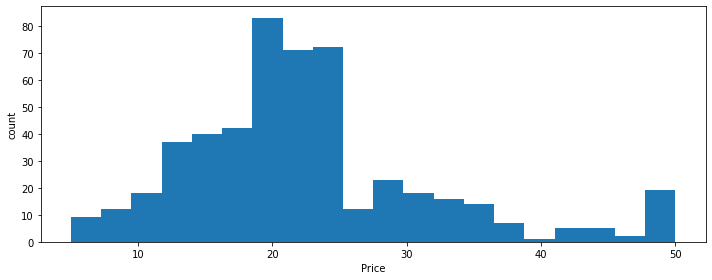

In [129]:
rcParams['figure.figsize'] = 10, 4
plt.hist(Y, bins = 20)
plt.xlabel('Price')
plt.ylabel('count')
plt.tight_layout()

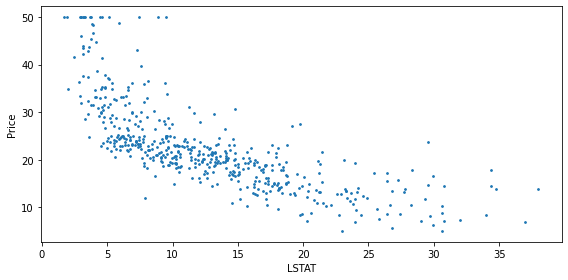

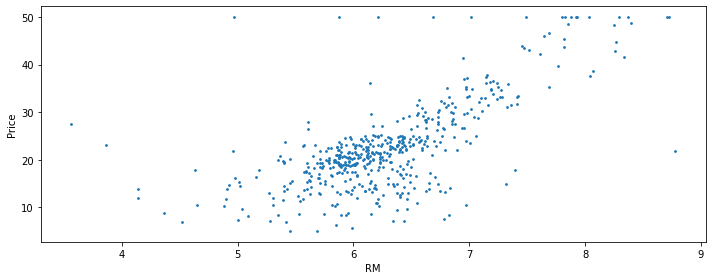

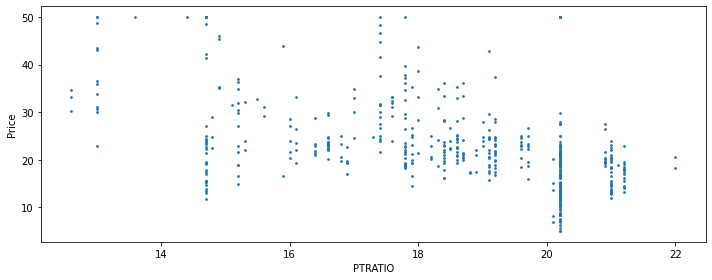

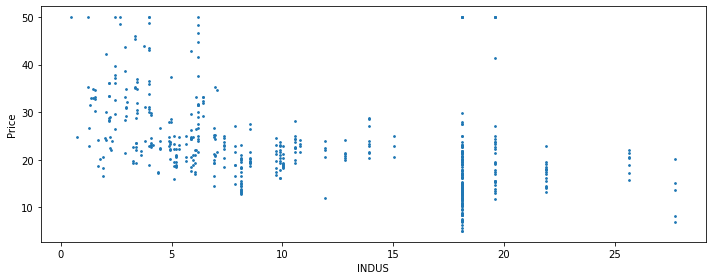

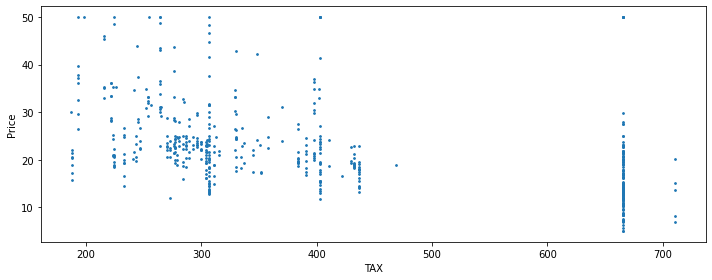

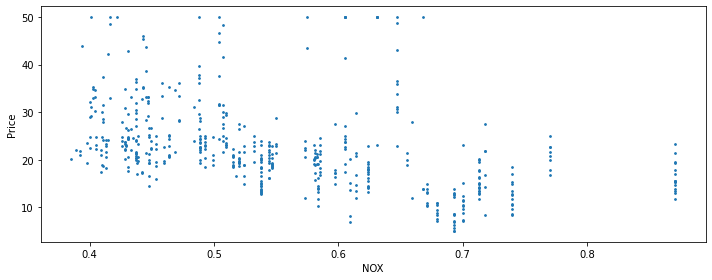

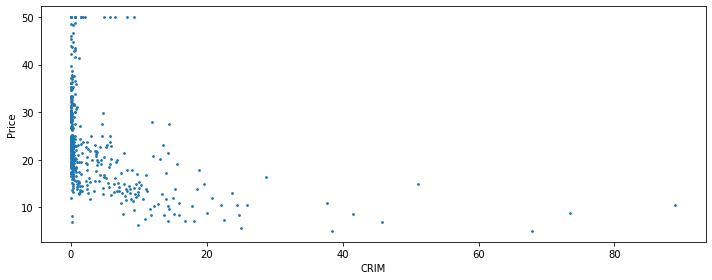

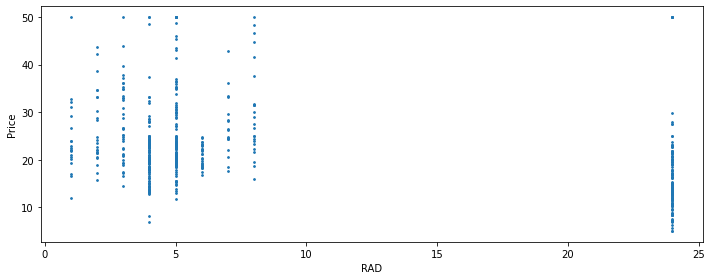

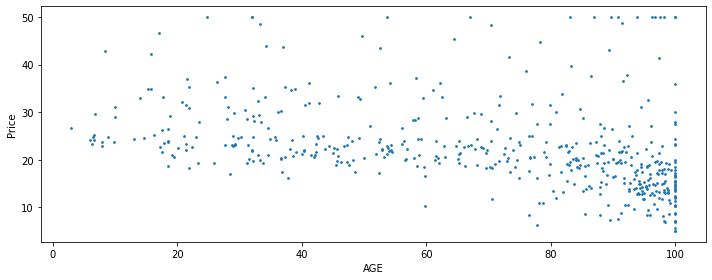

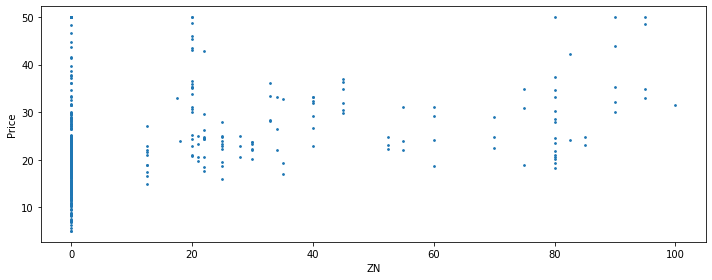

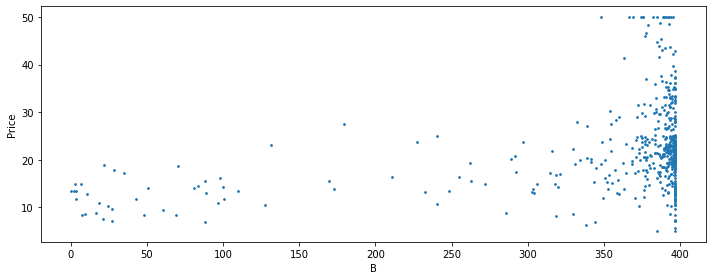

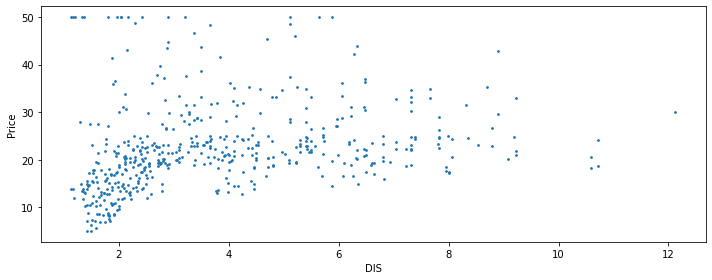

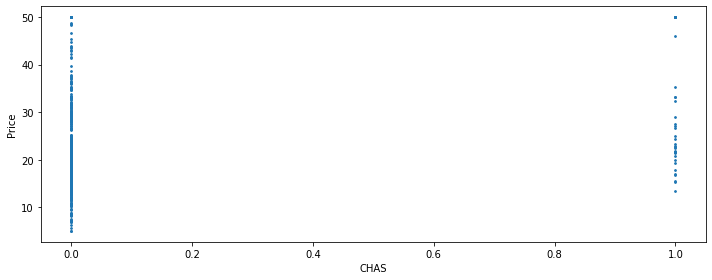

In [130]:
plt.figure(figsize=(8, 4))
for i, f in enumerate(features):
    plt.scatter(X[:, i], Y, s = 3)
    plt.ylabel('Price')
    plt.xlabel(f)
    plt.tight_layout()
    plt.show()

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test  = train_test_split(X, Y, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

In [132]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (323, 13), (323,)
Valid = (81, 13), (81,)
Test  = (102, 13), (102,)


## First Regressions

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
cols = [ 0 ]
_x_train = x_train[:, cols]
_x_test  = x_test[:, cols]
_x_valid = x_valid[:, cols]

clf = LinearRegression(fit_intercept=True)
clf.fit(_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
print(clf.intercept_, clf.coef_)

35.20237701246358 [-0.99891707]


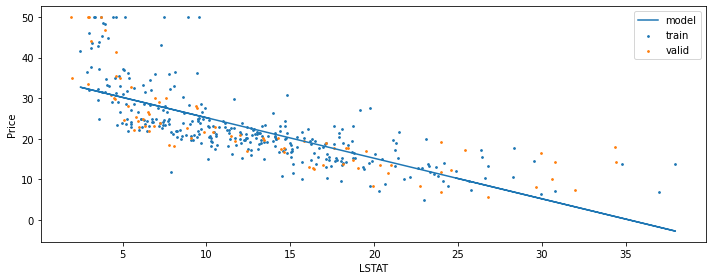

In [136]:
plt.scatter(_x_train, y_train, s = 3, label = 'train')
plt.scatter(_x_valid, y_valid, s = 3, label = 'valid')
plt.plot(_x_train, clf.predict(_x_train), label = 'model')
plt.xlabel(features[0])
plt.ylabel('Price')
plt.legend()
plt.tight_layout()

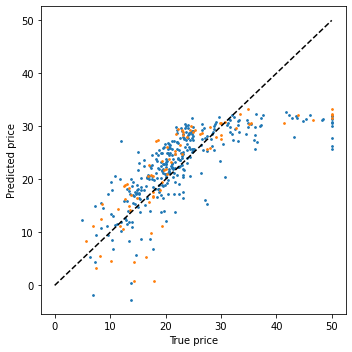

In [137]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [138]:
print(f'MAE = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}, {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'MSE = {mean_squared_error(clf.predict(_x_train), y_train):.2f}, {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'R2 =  {r2_score(clf.predict(_x_train), y_train):.2f}, {r2_score(clf.predict(_x_valid), y_valid):.2f}')

MAE = 4.37, 4.96
MSE = 37.09, 44.72
R2 =  0.14, 0.40


## Multiple Regression

In [139]:
cols = [ 0, 1 ]
_x_train = x_train[:, cols]
_x_test  = x_test[:, cols]
_x_valid = x_valid[:, cols]

clf = LinearRegression(fit_intercept=True)
clf.fit(_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
print(clf.intercept_, clf.coef_)

6.108270124071453 [-0.73320986  4.10030737]


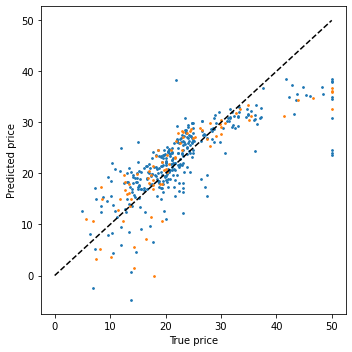

In [141]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [142]:
print(f'MAE = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}, {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'MSE = {mean_squared_error(clf.predict(_x_train), y_train):.2f}, {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'R2 =  {r2_score(clf.predict(_x_train), y_train):.2f}, {r2_score(clf.predict(_x_valid), y_valid):.2f}')

MAE = 3.96, 4.31
MSE = 31.41, 34.41
R2 =  0.36, 0.54


## Step Regression with columns only

In [143]:
for i in range(1, len(features) + 1):
    cols = list(range(i))
    print(cols)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [144]:
steps = []
train_stats = []
valid_stats = []

for i in range(1, len(features) + 1):
    cols = list(range(i))
    
    _x_train = x_train[:,cols]
    _x_valid = x_valid[:,cols]

    clf = LinearRegression(fit_intercept=True)
    clf.fit(_x_train, y_train)

    steps.append(i)
    train_stats.append([
        mean_absolute_error(clf.predict(_x_train), y_train),
        mean_squared_error(clf.predict(_x_train), y_train),
        r2_score(clf.predict(_x_train), y_train)
    ])
    valid_stats.append([
        mean_absolute_error(clf.predict(_x_valid), y_valid),
        mean_squared_error(clf.predict(_x_valid), y_valid),
        r2_score(clf.predict(_x_valid), y_valid)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

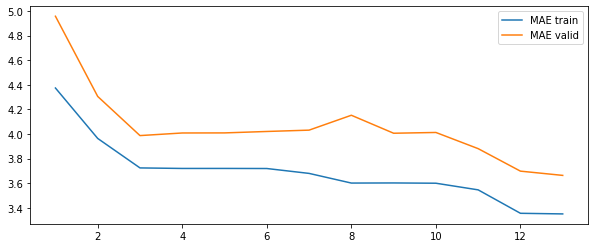

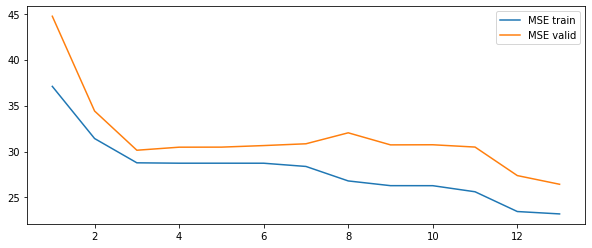

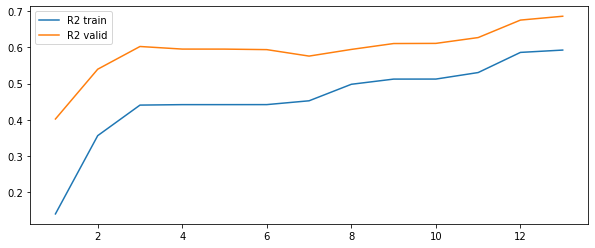

In [145]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    plt.legend()
    plt.show()

## Engineer features

In [146]:
from sklearn.preprocessing import PolynomialFeatures

In [188]:
clf = PolynomialFeatures(degree = 2, include_bias=False)
H = clf.fit_transform(X)
H.shape

(506, 104)

In [189]:
features = clf.get_feature_names(features)
features

['LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT PTRATIO',
 'LSTAT INDUS',
 'LSTAT TAX',
 'LSTAT NOX',
 'LSTAT CRIM',
 'LSTAT RAD',
 'LSTAT AGE',
 'LSTAT ZN',
 'LSTAT B',
 'LSTAT DIS',
 'LSTAT CHAS',
 'RM^2',
 'RM PTRATIO',
 'RM INDUS',
 'RM TAX',
 'RM NOX',
 'RM CRIM',
 'RM RAD',
 'RM AGE',
 'RM ZN',
 'RM B',
 'RM DIS',
 'RM CHAS',
 'PTRATIO^2',
 'PTRATIO INDUS',
 'PTRATIO TAX',
 'PTRATIO NOX',
 'PTRATIO CRIM',
 'PTRATIO RAD',
 'PTRATIO AGE',
 'PTRATIO ZN',
 'PTRATIO B',
 'PTRATIO DIS',
 'PTRATIO CHAS',
 'INDUS^2',
 'INDUS TAX',
 'INDUS NOX',
 'INDUS CRIM',
 'INDUS RAD',
 'INDUS AGE',
 'INDUS ZN',
 'INDUS B',
 'INDUS DIS',
 'INDUS CHAS',
 'TAX^2',
 'TAX NOX',
 'TAX CRIM',
 'TAX RAD',
 'TAX AGE',
 'TAX ZN',
 'TAX B',
 'TAX DIS',
 'TAX CHAS',
 'NOX^2',
 'NOX CRIM',
 'NOX RAD',
 'NOX AGE',
 'NOX ZN',
 'NOX B',
 'NOX DIS',
 'NOX CHAS',
 'CRIM^2',
 'CRIM RAD',
 'CRIM AGE',
 'CRIM ZN',
 'CRIM B',
 

In [190]:
x_train, x_test,  y_train, y_test  = train_test_split(H, Y, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

In [191]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (323, 104), (323,)
Valid = (81, 104), (81,)
Test  = (102, 104), (102,)


## Step Regression with columns and poly features

In [192]:
for i in range(1, len(features) + 1):
    cols = list(range(i))
    print(cols)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

In [193]:
steps = []
train_stats = []
valid_stats = []
models = []

for i in range(1, len(features) + 1):
    cols = list(range(i))
    
    _x_train = x_train[:,cols]
    _x_valid = x_valid[:,cols]

    clf = LinearRegression(fit_intercept=True)
    clf.fit(_x_train, y_train)

    steps.append(i)
    models.append(clf)
    train_stats.append([
        mean_absolute_error(clf.predict(_x_train), y_train),
        mean_squared_error(clf.predict(_x_train), y_train),
        r2_score(clf.predict(_x_train), y_train)
    ])
    valid_stats.append([
        mean_absolute_error(clf.predict(_x_valid), y_valid),
        mean_squared_error(clf.predict(_x_valid), y_valid),
        r2_score(clf.predict(_x_valid), y_valid)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

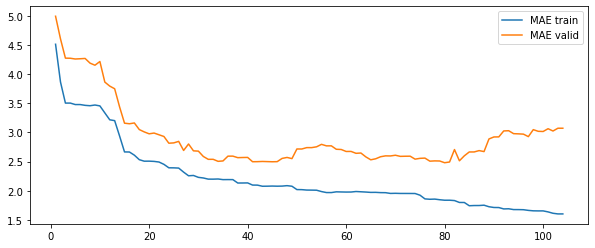

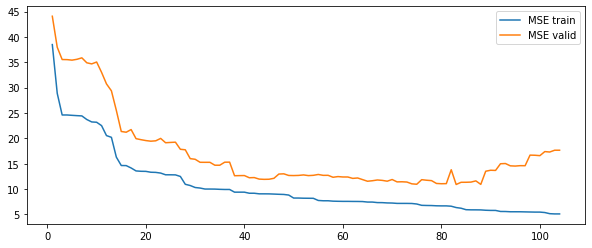

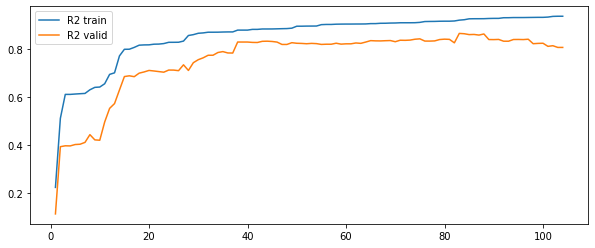

In [195]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    #plt.yscale('log')
    plt.legend()
    plt.show()

In [196]:
best_index = np.argmin(valid_stats[:,1])
best_index

82

In [197]:
clf = models[best_index]
cols = list(range(best_index + 1))
_x_train = x_train[:,cols]
_x_valid = x_valid[:,cols]
_x_test  = x_test[:,cols]

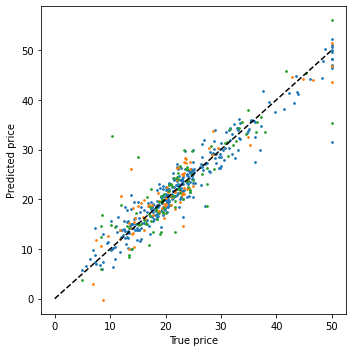

In [198]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.scatter(y_test, clf.predict(_x_test), s = 3, label = 'test')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [199]:
print('MAE')
print(f'train = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {mean_absolute_error(clf.predict(_x_test), y_test):.2f}')

MAE
train = 1.80
valid = 2.51
test  = 2.83


In [200]:
print('MSE')
print(f'train = {mean_squared_error(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {mean_squared_error(clf.predict(_x_test), y_test):.2f}')

MSE
train = 6.36
valid = 10.91
test  = 18.40


In [201]:
print('R2')
print(f'train = {r2_score(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {r2_score(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {r2_score(clf.predict(_x_test), y_test):.2f}')

R2
train = 0.92
valid = 0.87
test  = 0.75


## Step Regression with columns and poly features (k-fold)

In [202]:
x_train, x_test,  y_train, y_test = train_test_split(H, Y, test_size = 0.2)

In [203]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (404, 104), (404,)
Test  = (102, 104), (102,)


In [204]:
from sklearn.model_selection import KFold

steps = []
train_stats = []
valid_stats = []
models = []

kfold = KFold(n_splits = 10)
for i in range(1, len(features) + 1):
    cols = list(range(i))

    y_valid = np.copy(y_train)
    train_metrics = np.zeros((3,))
    for train_index, valid_index in kfold.split(x_train):
        
        _x_train = x_train[train_index,:][:,cols]
        _x_valid = x_train[valid_index,:][:,cols]
        _y_train = y_train[train_index]

        clf = LinearRegression(fit_intercept = True)
        clf.fit(_x_train, _y_train)
        train_metrics += [
            mean_absolute_error(clf.predict(_x_train), _y_train),
            mean_squared_error(clf.predict(_x_train), _y_train),
            r2_score(clf.predict(_x_train), _y_train)
        ]        
        y_valid[valid_index] = clf.predict(_x_valid)

    steps.append(i)
    models.append(clf)
    train_stats.append(
        train_metrics / kfold.n_splits
    )
    valid_stats.append([
        mean_absolute_error(y_valid, y_train),
        mean_squared_error(y_valid, y_train),
        r2_score(y_valid, y_train)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

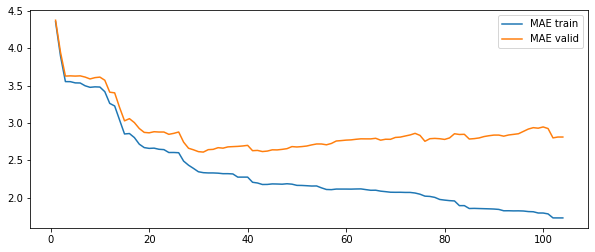

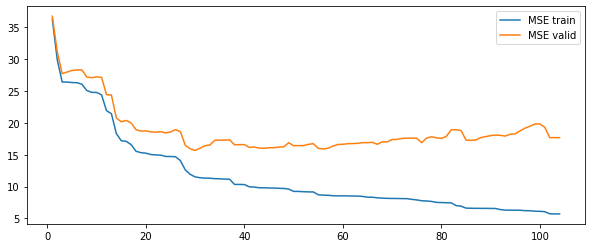

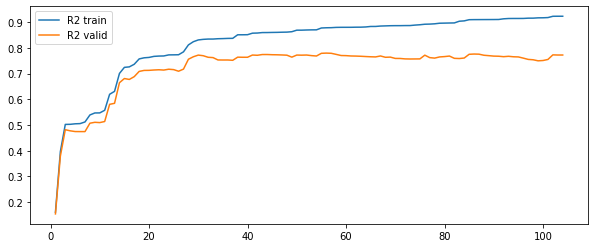

In [205]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    plt.legend()
    plt.show()

In [206]:
best_index = np.argmin(valid_stats[:,1])
best_index

29

In [207]:
clf = models[best_index]
cols = list(range(best_index + 1))
_x_train = x_train[:,cols]
_x_valid = x_valid[:,cols]
_x_test  = x_test[:,cols]

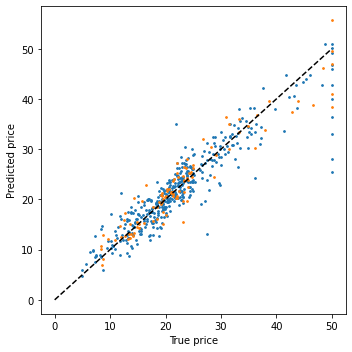

In [208]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_test, clf.predict(_x_test), s = 3, label = 'test')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [209]:
print('MAE')
print(f'train = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {mean_absolute_error(clf.predict(_x_test), y_test):.2f}')

MAE
train = 2.30
test  = 2.21


In [210]:
print('MSE')
print(f'train = {mean_squared_error(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {mean_squared_error(clf.predict(_x_test), y_test):.2f}')

MSE
train = 12.08
test  = 9.53


In [211]:
print('R2')
print(f'train = {r2_score(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {r2_score(clf.predict(_x_test), y_test):.2f}')

R2
train = 0.82
test  = 0.89


## Weights

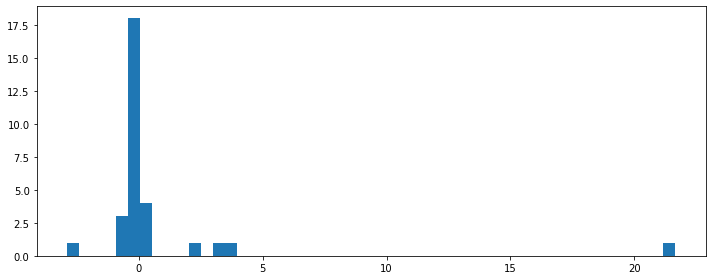

In [212]:
ws = clf.coef_
plt.hist(ws, bins = 50)
plt.tight_layout()

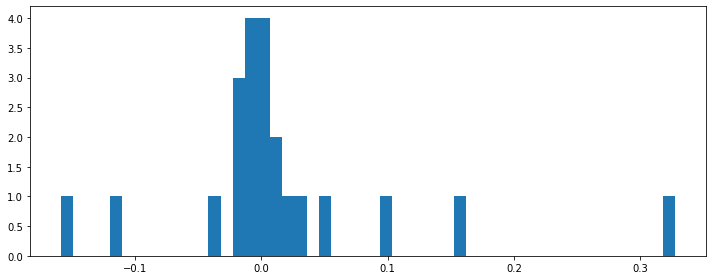

In [213]:
ws_mask = (ws > -0.5) & (ws < +0.5)
plt.hist(ws[ws_mask], bins = 50)
plt.tight_layout()

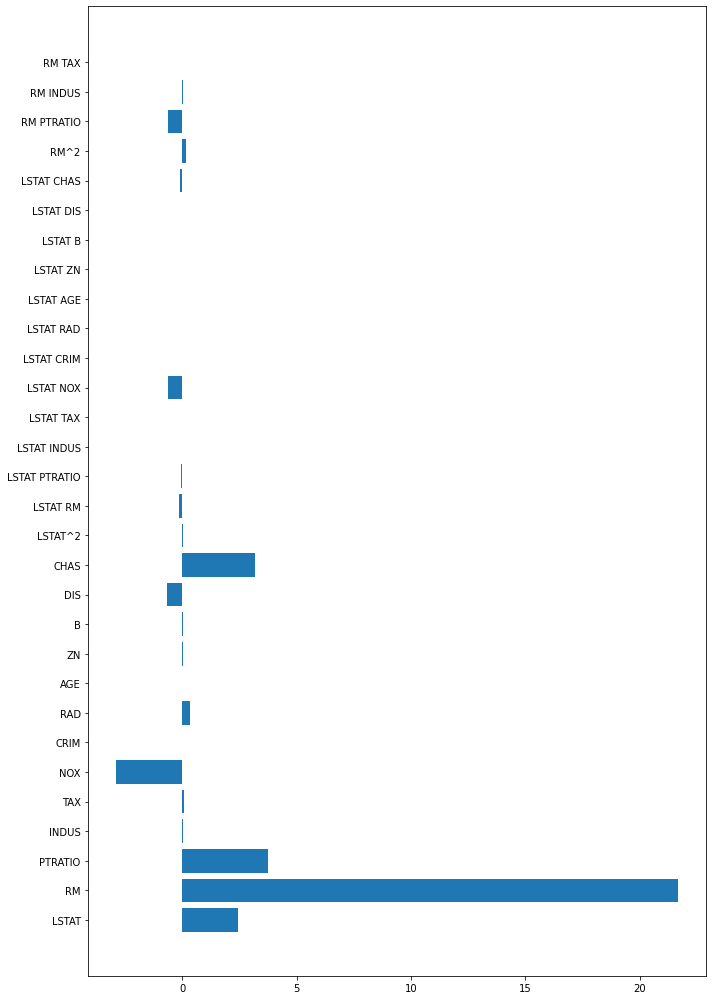

In [214]:
plt.figure(figsize=(10, 14))
plt.barh(np.array(features)[cols], ws)
plt.tight_layout()
plt.show()

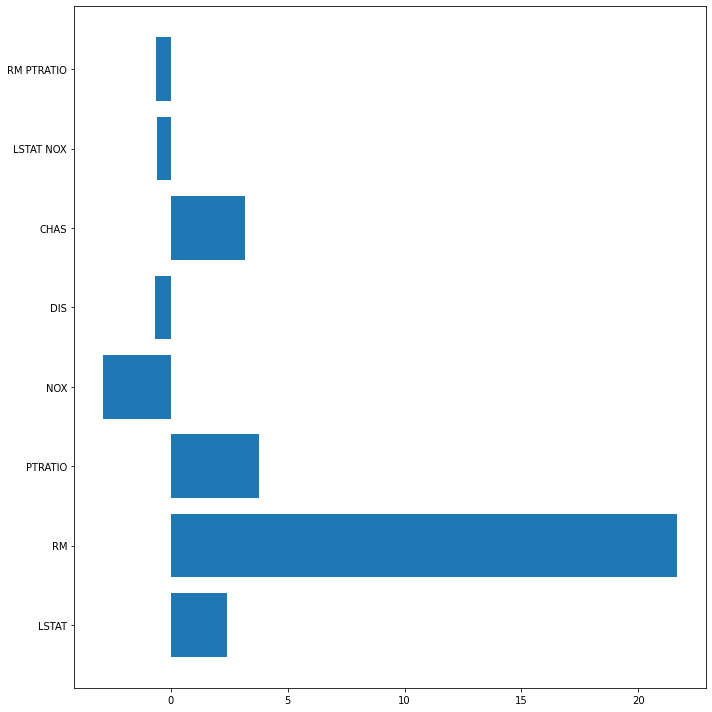

In [215]:
plt.figure(figsize=(10, 10))
plt.barh(np.array(features)[cols][np.invert(ws_mask)], ws[np.invert(ws_mask)])
plt.tight_layout()
plt.show()